In [9]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dados_conexao = (
    "Driver={SQL Server};"
    "Server=DESKTOP-2K9QLKU\SQLSERVER;"
    "Database=AdventureWorksDW2022;"
)
conexao = pyodbc.connect(dados_conexao)
print("Conexao bem sucedida")

Conexao bem sucedida


<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ANTONIO NETO\AppData\Local\Temp\ipykernel_60144\3534741212.py:7: SyntaxWarning: invalid escape sequence '\S'
  "Server=DESKTOP-2K9QLKU\SQLSERVER;"


In [10]:
codigo_sql = """
SELECT 
    fis.CustomerKey AS ClienteID,
    COUNT(fis.SalesOrderNumber) AS QuantidadeVendas, 
    ROUND(SUM(fis.SalesAmount), 2) AS ValorTotalVendas 
FROM 
    dbo.FactInternetSales fis
GROUP BY 
    fis.CustomerKey;
"""

dados = pd.read_sql(codigo_sql, conexao)
conexao.close()

C:\Users\ANTONIO NETO\AppData\Local\Temp\ipykernel_60144\1580887370.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dados = pd.read_sql(codigo_sql, conexao)


In [11]:
print(dados.head())

   ClienteID  QuantidadeVendas  ValorTotalVendas
0      14324                 4           5121.43
1      22814                 1              4.99
2      11407                 1             53.99
3      28387                 3            583.97
4      19897                 3            596.96


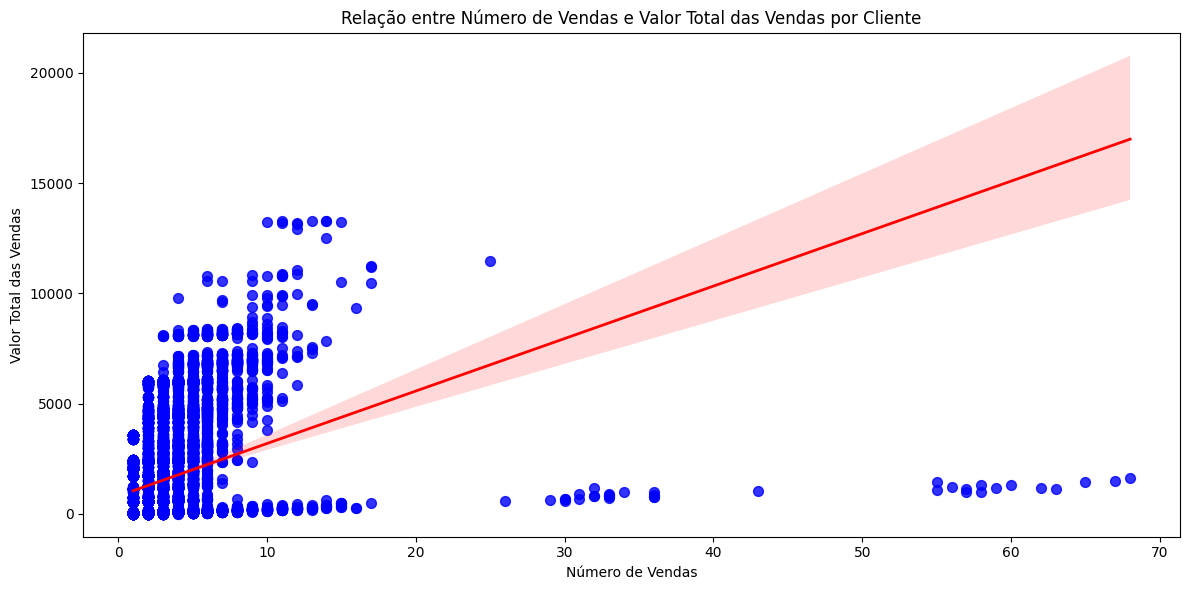

In [14]:
plt.figure(figsize=(12, 6))
sns.regplot(
    x='QuantidadeVendas',
    y='ValorTotalVendas',
    data=dados,
    scatter_kws={'color': 'blue', 's': 50},  
    line_kws={'color': 'red', 'lw': 2}  
)
plt.title('Relação entre Número de Vendas e Valor Total das Vendas por Cliente')
plt.xlabel('Número de Vendas')
plt.ylabel('Valor Total das Vendas')

plt.tight_layout()
plt.show()